In [1]:
import plotting_utils
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

sns.set_style("whitegrid")

In [2]:
# Results from ResNet
results_only_sim = pickle.load(
    open("../Data/training_results/resnet_results/results_only_sim.pkl", "rb")
)
results_only_real_data = pickle.load(
    open("../Data/training_results/resnet_results/results_only_real_data.pkl", "rb")
)
results_mixed_data = pickle.load(
    open("../Data/training_results/resnet_results/results_mixed_data.pkl", "rb")
)

# Results from LeNet
results_only_sim = pickle.load(
    open("../Data/training_results/lenet_results/results_only_sim.pkl", "rb")
)
results_only_real_data = pickle.load(
    open("../Data/training_results/lenet_results/results_only_real_data.pkl", "rb")
)
results_mixed_data = pickle.load(
    open("../Data/training_results/lenet_results/results_mixed_data.pkl", "rb")
)

In [3]:
# We repeated the training more than 10 times sometimes, make sure to only use the first ten repetitions for comparability

for key in results_only_sim:
    results_only_sim[key] = results_only_sim[key][:10]
for key in results_only_real_data:
    results_only_real_data[key] = results_only_real_data[key][:10]
for key in results_mixed_data:
    results_mixed_data[key] = results_mixed_data[key][:10]

In [4]:
# The performance metrics can be weighted in different way. When recording the results, we did not record which weighting
# we used but it can be recovered with the following function. The weighting reported in the paper is called 'classic'

classic_mixed = plotting_utils.get_classic_results(results_mixed_data)
classic_sim = plotting_utils.get_classic_results(results_only_sim)
classic_real = plotting_utils.get_classic_results(results_only_real_data)

In [5]:
results_ensemble = plotting_utils.get_ensemble_results(
    results_only_sim, results_mixed_data, results_only_real_data
)

Processing 1/53: 201910_Basel_FinFET_set10_negbias_ind_0
Processing 2/53: 201910_Basel_FinFET_set11_negbias_ind_0
Processing 3/53: 201910_Basel_FinFET_set12_negbias_ind_0
Processing 4/53: 201910_Basel_FinFET_set13_posbias_ind_0
Processing 5/53: 201910_Basel_FinFET_set1_negbias_ind_0
Processing 6/53: 201910_Basel_FinFET_set2_negbias_ind_0
Processing 7/53: 201910_Basel_FinFET_set3_negbias_ind_0
Processing 8/53: 201910_Basel_FinFET_set4_negbias_ind_0
Processing 9/53: 201910_Basel_FinFET_set5_negbias_ind_0
Processing 10/53: 201910_Basel_FinFET_set6_negbias_ind_0
Processing 11/53: 201910_Basel_FinFET_set6_posbias_ind_0
Processing 12/53: 201910_Basel_FinFET_set7_negbias_ind_0
Processing 13/53: 201910_Basel_FinFET_set7_posbias_ind_0
Processing 14/53: 201910_Basel_FinFET_set9_negbias_ind_0
Processing 15/53: 201910_Basel_FinFET_set9_posbias_ind_0
Processing 16/53: 202008_Basel_FinFET_set1_posbias_ind_0
Processing 17/53: 202010_Basel_FinFET_set1_negbias_ind_0
Processing 18/53: 202010_Basel_FinFE

In [6]:
results_mixed_data = classic_mixed
results_only_sim = classic_sim
results_only_real_data = classic_real

# Plot results

starting to plot


/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/jonasschuff/opt/anaconda3/envs/test2/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire 

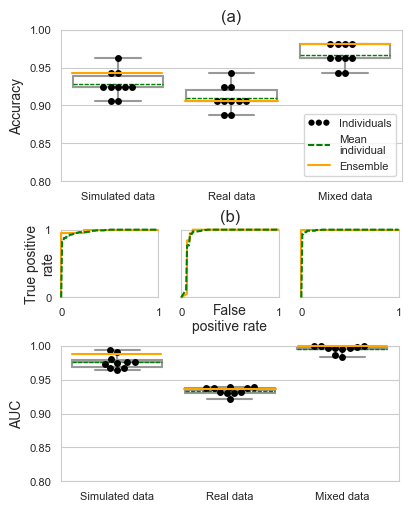

In [7]:
plotting_utils.get_complete_plot(
    results_only_sim,
    results_mixed_data,
    results_only_real_data,
    results_ensemble,
    save_name="test",
)

# Plot sample size comparison

In [8]:
classic_different_sample_sizes = {}
results_different_sample_sizes = pickle.load(
    open(
        "../Data/training_results/resnet_results/results_only_sim_different_sample_sizes.pkl",
        "rb",
    )
)
results_different_sample_sizes[25000] = results_only_sim
for key, item in results_different_sample_sizes.items():
    classic_different_sample_sizes[key] = plotting_utils.get_classic_results(item)

In [9]:
names = np.unique(results_only_sim["triangle_names"][0])
(
    classic_different_sample_sizes,
    results_ensemble_compare_samplesize,
) = plotting_utils.process_data_sample_size_comparison(
    classic_different_sample_sizes,
    results_different_sample_sizes,
    names,
    results_only_sim,
)

starting to plot


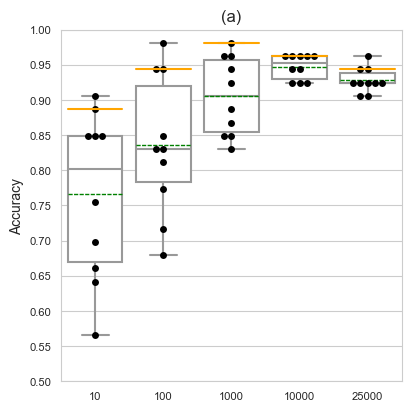

In [10]:
plotting_utils.plot_sample_size_comparison(
    classic_different_sample_sizes,
    results_different_sample_sizes,
    results_ensemble_compare_samplesize,
    save_name="sample_size_comparison",
)

# Plot all examples

load individual real examples

In [11]:
device_type = "finfets"
X = np.load("../Data/processed_data/" + device_type + "_imgs.npy", allow_pickle=True)
y = np.load("../Data/processed_data/" + device_type + "_labels.npy")
triangle_names = np.load("../Data/processed_data/" + device_type + "_names.npy")
device_names = np.load("../Data/processed_data/" + device_type + "_device_names.npy")

form ensemble predictions for each example

In [12]:
predictions = plotting_utils.get_ensemble_preds_each(
    results_only_sim, results_mixed_data, results_only_real_data
)

plot all real examples with ensemble prediction

device i done
device ii done
device iii done
device iv done


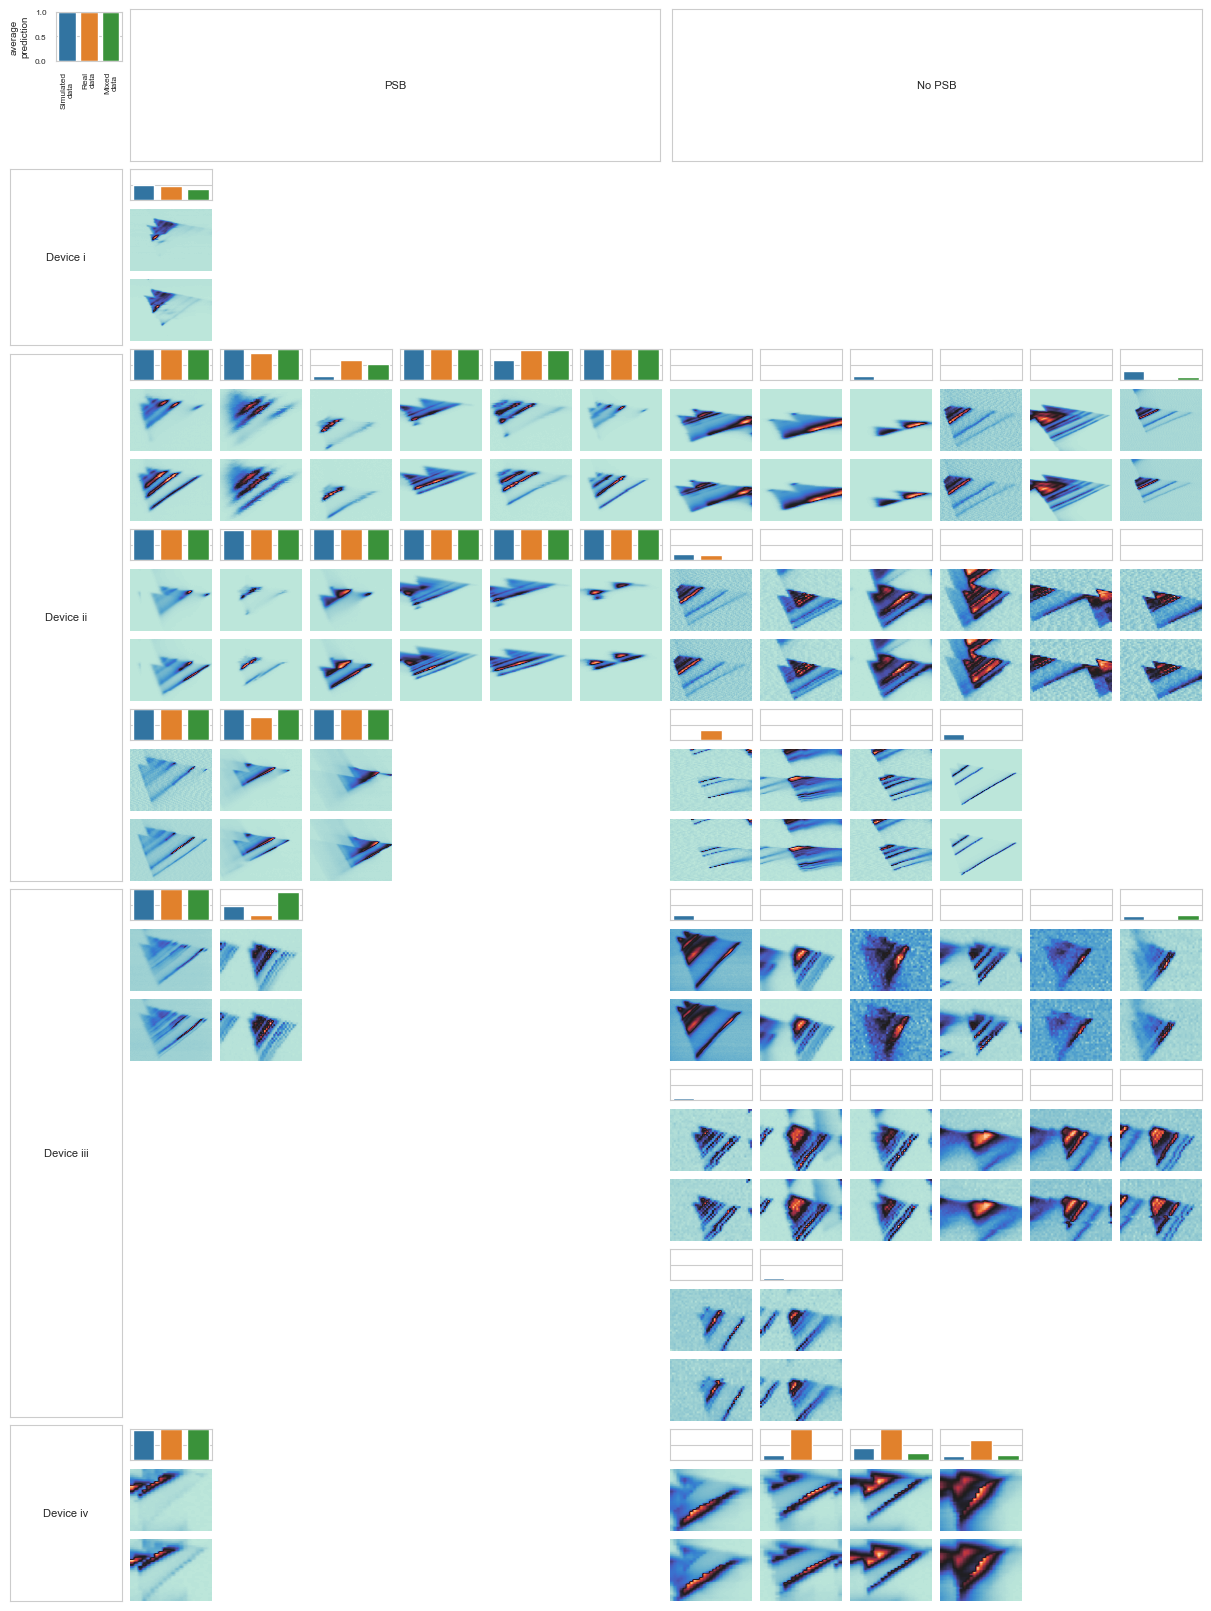

In [13]:
plotting_utils.plot_all_examples(predictions, X, y, triangle_names, device_names, "all")